<a href="https://colab.research.google.com/github/WengGeyu/NMA-DL/blob/main/load_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.4.0-cp36-cp36m-linux_x86_64.whl
!pip3 install torchvision
# !pip install medicaltorch
!pip3 install numpy==1.14.1
!pip install openneuro-py

# Import all the necessary packages
import numpy as np
import nibabel as nib
# import itk
# import itkwidgets
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

from collections import defaultdict
import time
import os

from tqdm import tqdm

# from medicaltorch import datasets as mt_datasets
# from medicaltorch import models as mt_models
# from medicaltorch import transforms as mt_transforms
# from medicaltorch import losses as mt_losses
# from medicaltorch import metrics as mt_metrics
# from medicaltorch import filters as mt_filters

import torch
from torchvision import transforms
from torch.utils.data import DataLoader
from torch import autograd, optim
import torch.backends.cudnn as cudnn
import torch.nn as nn

import torchvision.utils as vutils

cudnn.benchmark = True
import matplotlib.pyplot as plt
%matplotlib inline

ERROR: torch-0.4.0-cp36-cp36m-linux_x86_64.whl is not a supported wheel on this platform.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 35.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 417, in run
    _, build_failures = build(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/wheel_builder.py", line 320, in build
    wheel_file = _build_one(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/wheel_builder.py", line 194, in _build_one
    wheel_path = _build_one_inside_env(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/

In [6]:
from google.colab import drive
drive.mount('/gdrive')
import openneuro as on
on.download(dataset='ds003949', target_dir='data/bids')


👋 Hello! This is openneuro-py 2023.1.0. Great to see you! 🤗

   👉 Please report problems 🤯 and bugs 🪲 at
      https://github.com/hoechenberger/openneuro-py/issues

🌍 Preparing to download ds003949 …


📁 Traversing directories for ds003949 : 0 entities [00:00, ? entities/s]

ERROR:sgqlc.endpoint.requests:log_error - https://openneuro.org/crn/graphql: 502 Server Error: Bad Gateway for url: https://openneuro.org/crn/graphql
/usr/local/lib/python3.10/dist-packages/openneuro/_download.py:208: RuntimeWarning: coroutine 'sleep' was never awaited
  asyncio.sleep(retry_backoff)


  Request timed out while fetching metadata, retrying …


KeyboardInterrupt: ignored

In [15]:
input_path = "/content/ds003949/derivatives/N4_bias_field_corrected/sub-000/ses-20110101/anat"
input_filename = os.path.join(input_path,'sub-000_ses-20110101_desc-angio_N4bfc_mask.nii.gz')
image_obj = nib.load(input_filename)
print(f'Type of the image {type(image_obj)}')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
Type of the image <class 'nibabel.nifti1.Nifti1Image'>


The image object has the following dimensions: height: 350, width:448, depth:160
Plotting Layer 159 Channel 0 of Image


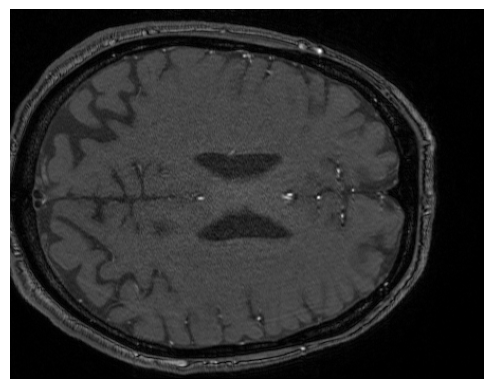

In [19]:
# Extract data as numpy ndarray
image_data = image_obj.get_fdata()
# Get the image shape and print it out
height, width, depth = image_data.shape
print(f"The image object has the following dimensions: height: {height}, width:{width}, depth:{depth}")
# Select random layer number
maxval = depth
i = np.random.randint(0, maxval)
# Define a channel to look at
channel = 0
print(f"Plotting Layer {i} Channel {channel} of Image")
plt.imshow(image_data[:, :, i], cmap='gray')
plt.axis('off');